# EJERCICIOS: Regresión lineal y polinomial con Boston Housing dataset

1. Carga el dataset de Boston Housing dataset. En cada ejercicio puedes dividir en train y test.


In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv("BostonHousing.csv") 
df.head(5)

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [3]:
df.shape #333 filas y 15 columnas

(333, 15)

2.a. Haz un histograma de la variable objetivo con la función hist.

MEDV - Median value of owner-occupied homes in $1000's

<Axes: ylabel='Frequency'>

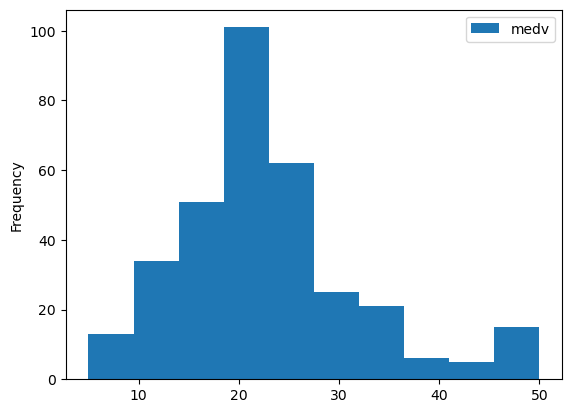

In [9]:
df[['medv']].plot.hist(bins=10)

2.b. Ahora haz un histograma de la variable objetivo mediante la función distplot de la
librería seaborn.

C:\Users\laura\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight

  self._figure.tight_layout(*args, **kwargs)


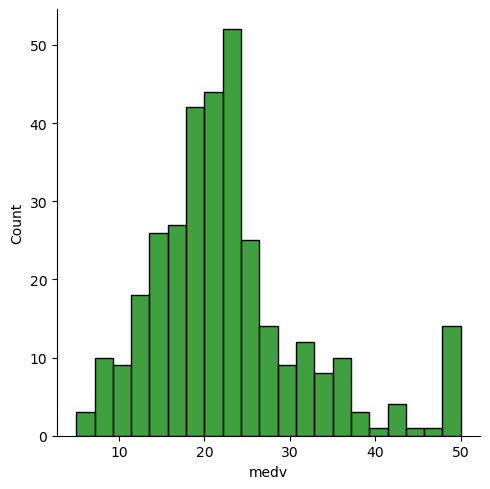

In [10]:
sns.displot(x=df["medv"], color="green")
plt.show()

2.c. Verifica que no hay ningún missing en ninguna de las variables del dataset.

In [13]:
df.isnull().sum() #no hay nulos

ID         0
crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

2.d. Haz un scatter con cada una de las variables age, dis, lstat y rm con la variable a
predecir medv. Entiende las variables e interpreta los gráficos. Si estimaramos
un modelo de regresión lineal con estas 4 variables:

In [14]:
df.head(1)

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24.0


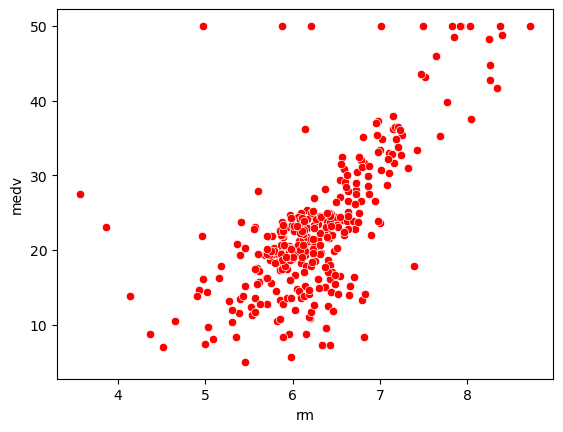

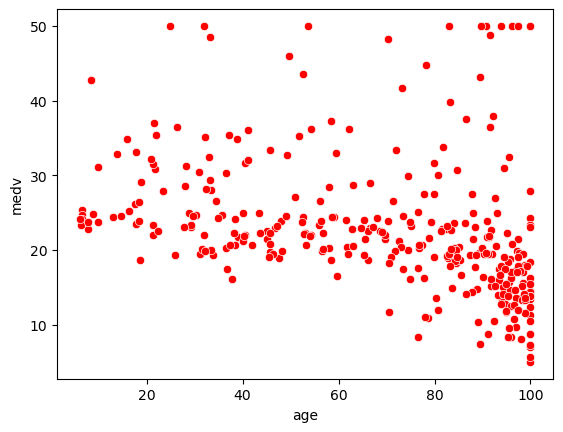

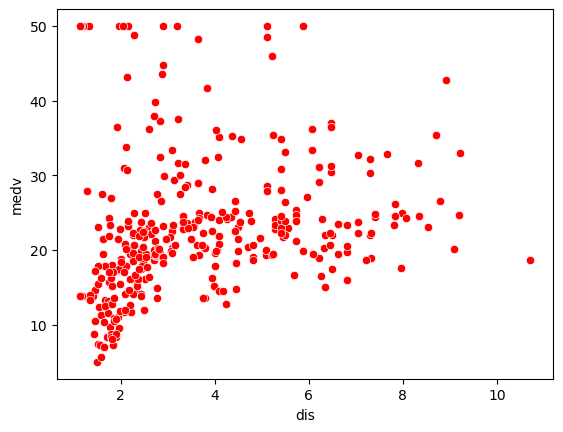

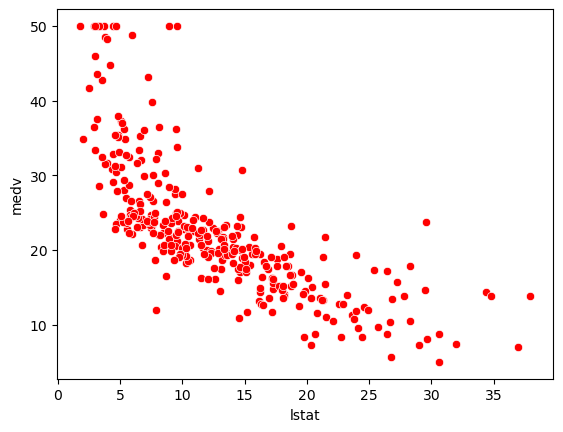

In [15]:
for i in df.columns[[6,7,8,13]]:
    sns.scatterplot(x = df[i] , y = df.medv, color="r")
    plt.show()

- RM - número medio de habitaciones por vivienda  
Relación positiva, tiene sentido  

- AGE: proporción de unidades ocupadas por sus propietarios construidas antes de 1940  
Parece haber una relación negativa, pero bastante debil. Supongo que tiene sentido. No todas las casas viejas tienen que ser mas baratas.

- DIS: distancias ponderadas a cinco centros de empleo de Boston 
Relación positiva, aunque con algunas excepciones. Tiene sentido si suponemos que las casas mas alejadas de la ciudad son las mas caras, con algunas excepciones en el centro de l ciudad.

- LSTAT - % de estatus inferior de la población 
Relacion negativa. Cuanto mayor proporcion de población con ingresos bajos, menor precio de la vivienda.

3. Estima 4 regresiones lineales simples distintas, una para cada una de las 4 variables anteriores.  
a. Obtén el coeficiente de la pendiente de cada recta y grafica la recta de ajuste junto a la nube de puntos. ¿Coincide el signo con lo que esperabas en el apartado d anterior?  
b. ¿Cuál de los 4 modelos obtiene mejor MSE? ¿Cuál obtiene mejor R2?

In [32]:
# Variable rm
rmmod = linear_model.LinearRegression() 
rmmod.fit(df[['rm']], df['medv']) #las x tienen que ser arry 2d (1 columna x n filas)
b1=rmmod.coef_
b0=rmmod.intercept_

MSE:  44.00162841002106

R2:  0.4755455247485777


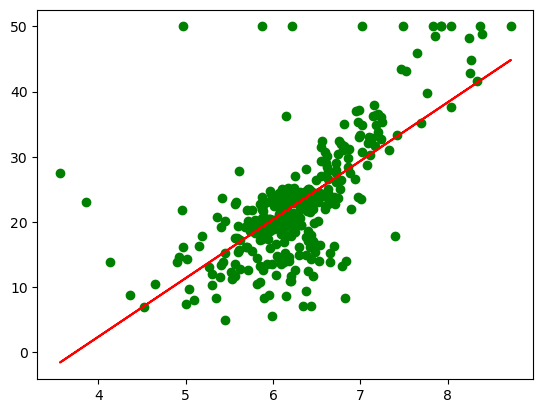

In [37]:
yhat = b1*df.rm + b0 # y_pred_mano

plt.plot(df.rm, df.medv, "og") # los valores reales
plt.plot(df.rm, yhat, "r")

print('MSE: ',(mean_squared_error(df.medv, yhat)))
print('R2: ',(r2_score(df.medv, yhat)))

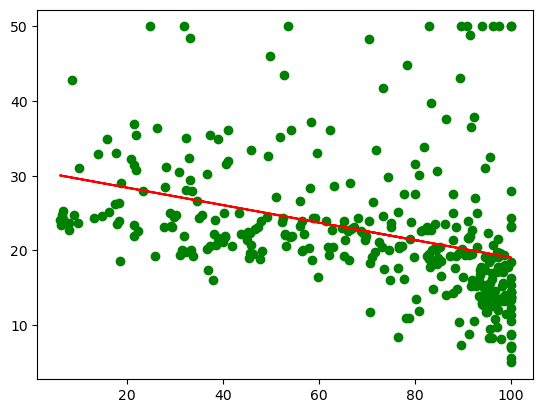

C:\Users\laura\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight

  self._figure.tight_layout(*args, **kwargs)


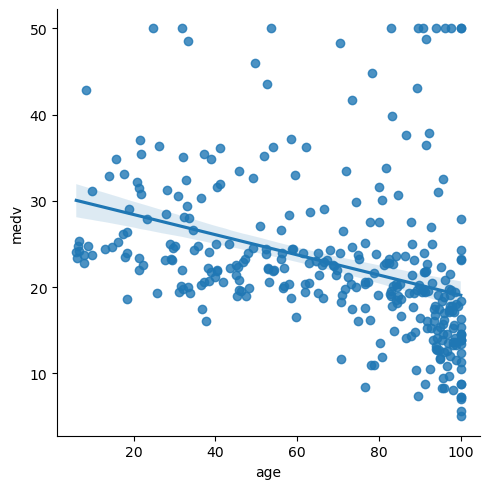

MSE:  73.0934439023321

R2:  0.12880079325913063


In [38]:
# Variable Age
agemod = linear_model.LinearRegression() 
agemod.fit(df[['age']], df['medv']) #las x tienen que ser arry 2d (1 columna x n filas)
b1=agemod.coef_
b0=agemod.intercept_
#yhat = b1*df.age + b0 
yhat = agemod.predict(df[['age']])

plt.plot(df.age, df.medv, "og") # los valores reales
plt.plot(df.age, yhat, "r")
plt.show()

sns.lmplot(x="age", y="medv", data=df)
plt.show()

print('MSE: ',(mean_squared_error(df.medv, yhat)))
print('R2: ',(r2_score(df.medv, yhat)))

C:\Users\laura\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight

  self._figure.tight_layout(*args, **kwargs)


MSE:  78.68027533932556

R2:  0.06221146792090604


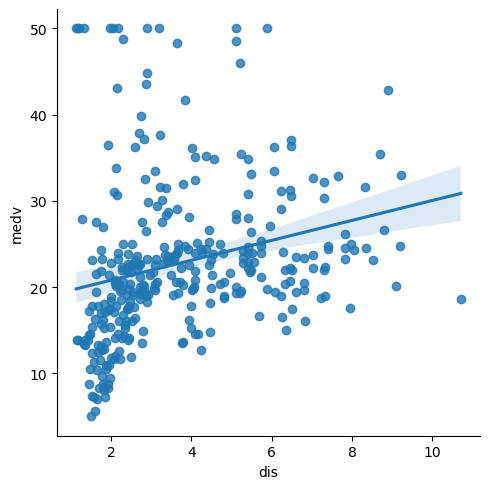

In [39]:
# Variable dis
dismod = linear_model.LinearRegression() 
dismod.fit(df[['dis']], df['medv']) #las x tienen que ser arry 2d (1 columna x n filas)
b1=dismod.coef_
b0=dismod.intercept_
#yhat = b1*df.age + b0 
yhat = dismod.predict(df[['dis']])

sns.lmplot(x="dis", y="medv", data=df)

print('MSE: ',(mean_squared_error(df.medv, yhat)))
print('R2: ',(r2_score(df.medv, yhat)))

C:\Users\laura\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight

  self._figure.tight_layout(*args, **kwargs)


MSE:  38.12994358928325

R2:  0.5455300115227188


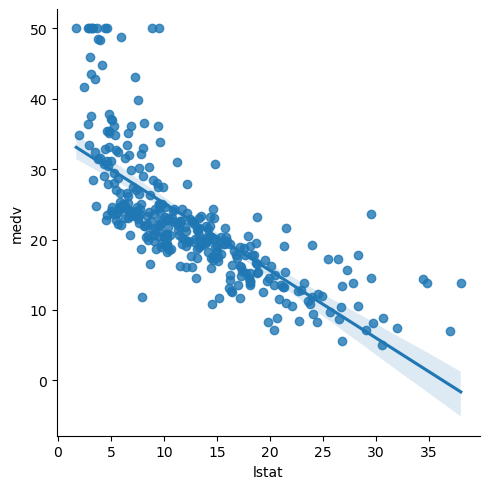

In [40]:
# Variable lstat
lstatmod = linear_model.LinearRegression() 
lstatmod.fit(df[['lstat']], df['medv']) #las x tienen que ser arry 2d (1 columna x n filas)
b1=lstatmod.coef_
b0=lstatmod.intercept_
#yhat = b1*df.age + b0 
yhat = lstatmod.predict(df[['lstat']])

sns.lmplot(x="lstat", y="medv", data=df)

print('MSE: ',(mean_squared_error(df.medv, yhat)))
print('R2: ',(r2_score(df.medv, yhat)))

4. Ahora estima una regresión incorporando solamente las variables lstat y rm.  
a. Obtén los coeficientes de cada variable. ¿Siguen presentando el mismo signo que por separado?  
b. ¿El nuevo modelo presenta mejor MSE y mejor R2?  
c. Gráfica la variable objetivo (la y real) contra la predicción y analiza el gráfico.  
d. ¿Cual es el efecto marginal de cada variable?  

In [44]:
X=df[['lstat','rm']]
y=df.medv

multimod=linear_model.LinearRegression()
multimod.fit(X,y)
print(multimod.coef_)
print('lstat: ',lstatmod.coef_)
print('rm: ',rmmod.coef_)

[-0.65639414  4.92846523]

lstat:  [-0.9586494]

rm:  [8.98642214]


In [ ]:
print('MSE: ',(mean_square_error(